Dataset shape: (2500, 15)
Columns:
['price', 'cost', 'sales', 'profit_margin', 'inventory', 'discount_percentage', 'delivery_days', 'category', 'material', 'color', 'location', 'season', 'store_type', 'brand', 'revenue']


,price,cost,sales,profit_margin,inventory,discount_percentage,delivery_days,category,material,color,location,season,store_type,brand,revenue
0,218.543053,181.610932,40,16.899243,105,27.796433,9,Bed,Plastic,Red,Rural,Spring,Online,BrandA,3949.165238
1,477.821438,385.033827,7,19.418888,192,26.943715,6,Chair,Glass,Blue,Rural,Summer,Online,BrandD,-3521.002258
2,379.397274,276.736765,32,27.058842,59,21.948130,2,Table,Metal,Black,Suburban,Fall,Online,BrandD,14285.560219
3,319.396318,281.841334,48,11.758114,45,11.009944,2,Table,Glass,Green,Rural,Summer,Retail,BrandD,12261.073703
4,120.208388,69.743681,19,41.981019,35,3.183763,9,Chair,Glass,Brown,Rural,Fall,Online,BrandD,-4588.255733



SECTION 1: INPUT ATTRIBUTES

DataFrame info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                2500 non-null   float64
 1   cost                 2500 non-null   float64
 2   sales                2500 non-null   int64  
 3   profit_margin        2500 non-null   float64
 4   inventory            2500 non-null   int64  
 5   discount_percentage  2500 non-null   float64
 6   delivery_days        2500 non-null   int64  
 7   category             2500 non-null   object 
 8   material             2500 non-null   object 
 9   color                2500 non-null   object 
 10  location             2500 non-null   object 
 11  season               2500 non-null   object 
 12  store_type           2500 non-null   object 
 13  brand                2500 non-null   object 
 14  revenue              2500 non-null   flo

,price,cost,sales,profit_margin,inventory,discount_percentage,delivery_days,revenue
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.00000,2500.000000
mean,274.495219,191.930107,24.924000,30.208571,97.715600,14.947616,4.89400,5926.853657
std,130.898452,98.590751,14.050067,11.536804,57.616228,8.621547,2.55902,6902.737604
min,50.704297,26.505895,1.000000,10.017692,0.000000,0.005556,1.00000,-14214.565505
25%,159.104890,106.399135,13.000000,20.230697,50.000000,7.760214,3.00000,1216.719195
50%,277.641809,189.336329,25.000000,30.297911,94.000000,14.915143,5.00000,5523.232714
75%,387.378046,263.188280,37.000000,40.134205,147.000000,22.292661,7.00000,10233.537982
max,499.872953,447.022911,49.000000,49.999535,199.000000,29.991229,9.00000,32922.078832



Missing values in input columns before preprocessing:
sales    0
cost     0
dtype: int64

Missing values in input columns AFTER dropping NAs and invalid values:
sales    0
cost     0
dtype: int64

Descriptive statistics for input attributes (Sales & Cost):


,sales,cost
count,2500.000000,2500.000000
mean,24.924000,191.930107
std,14.050067,98.590751
min,1.000000,26.505895
25%,13.000000,106.399135
50%,25.000000,189.336329
75%,37.000000,263.188280
max,49.000000,447.022911


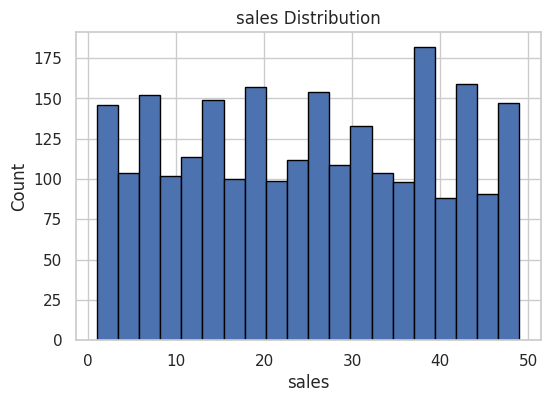

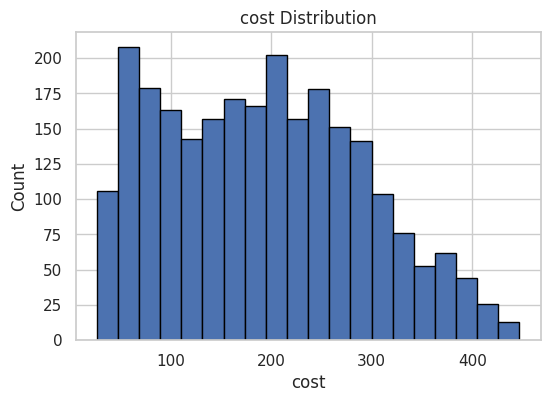


SECTION 2: OUTPUT ATTRIBUTE (STATE)

Basic statistics of Profit_Margin:


count    2500.000000
mean      -15.748037
std        32.074646
min      -388.411199
25%       -13.630589
50%        -6.681042
75%        -3.331610
max         0.357977
Name: Profit_Margin, dtype: float64

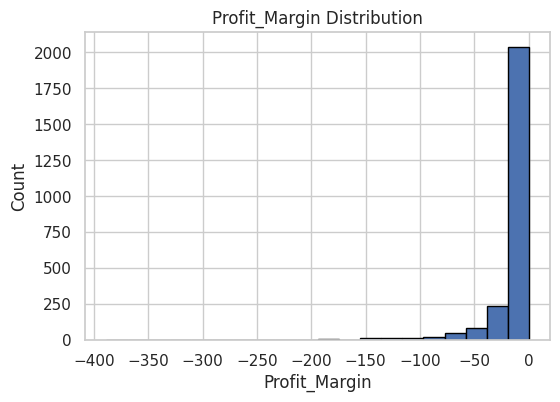


Current State value counts:
State
High      850
Low       825
Medium    825
Name: count, dtype: int64

Current State percentages:
State
High      34.0
Low       33.0
Medium    33.0
Name: proportion, dtype: float64


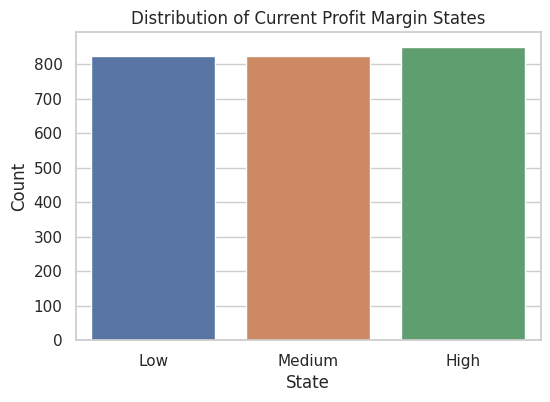


No valid DATE_COL provided - using current row order as sequence.

Example of State -> NextState transitions:


,State,NextState
0,High,Low
1,Low,Medium
2,Medium,Medium
3,Medium,High
4,High,Medium



NextState value counts:
NextState
High      849
Low       825
Medium    825
Name: count, dtype: int64

NextState percentages:
NextState
High      33.973589
Low       33.013205
Medium    33.013205
Name: proportion, dtype: float64


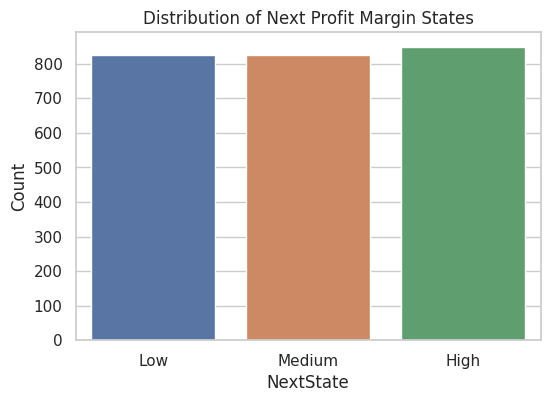


SECTION 3: MARKOV MODEL CONSTRUCTION

Transition COUNTS matrix:


,Low,Medium,High
Low,286,273,265
Medium,254,276,295
High,285,276,289



Transition PROBABILITY matrix:


,Low,Medium,High
Low,0.347,0.331,0.322
Medium,0.308,0.335,0.358
High,0.335,0.325,0.340



SECTION 4: RESULTS & VISUALIZATION



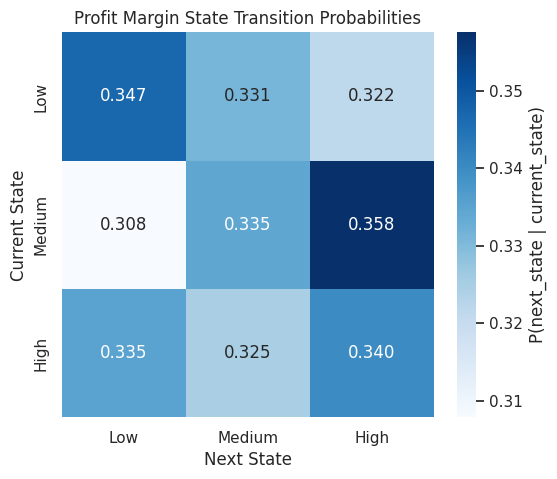


Most likely next state from each current state:
From 'Low' -> 'Low' with probability 0.347
From 'Medium' -> 'High' with probability 0.358
From 'High' -> 'High' with probability 0.340


In [8]:
# ============================================================
# CSEN 933 - Project 1: Markov Model
# Business Problem:
#   Profit margin stability in furniture sales:
#   We model how order-level profit margin state (Low / Medium / High)
#   transitions over time using a Markov Chain.
#
# Dataset: Kaggle - Furniture Sales Data by Raj Agrawal
# File: /kaggle/input/furniture-sales-data/Furniture.csv
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# ------------------------------------------------------------
# 0. LOAD DATASET
# ------------------------------------------------------------

df = pd.read_csv("/kaggle/input/furniture-sales-data/Furniture.csv")

print("Dataset shape:", df.shape)
print("Columns:")
print(df.columns.tolist())

display(df.head())

# ------------------------------------------------------------
# 0.1 SET COLUMN NAMES (EDIT THESE TO MATCH YOUR DATA)
# ------------------------------------------------------------
# After checking df.columns, set these three variables to the correct names.

SALES_COL = "sales"      # e.g. "Sales", "Selling Price", "Revenue"
COST_COL  = "cost"       # e.g. "Cost", "Buying Price"
DATE_COL  = None         # e.g. "Order Date" (or None if no date column)

# If your dataset does NOT have a column called "Sales" or "Cost",
# change SALES_COL and COST_COL above to the correct names.

# ------------------------------------------------------------
# 1. INPUT ATTRIBUTE ANALYSIS & PREPROCESSING  [3 marks]
#    - Input attributes: Sales and Cost (used to compute Profit Margin)
# ------------------------------------------------------------

print("\n=============================")
print("SECTION 1: INPUT ATTRIBUTES")
print("=============================\n")

# 1.1 Basic info & summary for input attributes
print("DataFrame info():")
df.info()

print("\nSummary of numeric columns:")
display(df.describe())

# Check that the chosen columns exist
if SALES_COL not in df.columns:
    raise KeyError(f"SALES_COL '{SALES_COL}' not found in columns. Please fix it.")
if COST_COL not in df.columns:
    raise KeyError(f"COST_COL '{COST_COL}' not found in columns. Please fix it.")

# 1.2 Handle missing values in input attributes
print("\nMissing values in input columns before preprocessing:")
print(df[[SALES_COL, COST_COL]].isnull().sum())

# For simplicity: drop rows where Sales or Cost are missing or non-positive
df = df.dropna(subset=[SALES_COL, COST_COL]).copy()
df = df[(df[SALES_COL] > 0) & (df[COST_COL] >= 0)]

print("\nMissing values in input columns AFTER dropping NAs and invalid values:")
print(df[[SALES_COL, COST_COL]].isnull().sum())

# 1.3 Descriptive statistics & distribution plots (EDA)
print("\nDescriptive statistics for input attributes (Sales & Cost):")
display(df[[SALES_COL, COST_COL]].describe())

# Histograms
plt.figure(figsize=(6,4))
plt.hist(df[SALES_COL], bins=20, edgecolor="black")
plt.title(f"{SALES_COL} Distribution")
plt.xlabel(SALES_COL)
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(6,4))
plt.hist(df[COST_COL], bins=20, edgecolor="black")
plt.title(f"{COST_COL} Distribution")
plt.xlabel(COST_COL)
plt.ylabel("Count")
plt.show()

# ------------------------------------------------------------
# 2. OUTPUT ATTRIBUTE ANALYSIS & PREPROCESSING  [3 marks]
#    - Output attribute: Next profit margin state
#    - We first compute Profit_Margin and its current State,
#      then define NextState as the predicted output.
# ------------------------------------------------------------

print("\n====================================")
print("SECTION 2: OUTPUT ATTRIBUTE (STATE)")
print("====================================\n")

# 2.1 Compute profit margin for each sale
df["Profit_Margin"] = (df[SALES_COL] - df[COST_COL]) / df[SALES_COL]

print("Basic statistics of Profit_Margin:")
display(df["Profit_Margin"].describe())

plt.figure(figsize=(6,4))
plt.hist(df["Profit_Margin"], bins=20, edgecolor="black")
plt.title("Profit_Margin Distribution")
plt.xlabel("Profit_Margin")
plt.ylabel("Count")
plt.show()

# 2.2 Define discrete margin states (Low / Medium / High) using quantiles
q1 = df["Profit_Margin"].quantile(0.33)
q2 = df["Profit_Margin"].quantile(0.66)

def margin_state(m):
    if m <= q1:
        return "Low"
    elif m <= q2:
        return "Medium"
    else:
        return "High"

df["State"] = df["Profit_Margin"].apply(margin_state)

print("\nCurrent State value counts:")
print(df["State"].value_counts())
print("\nCurrent State percentages:")
print(df["State"].value_counts(normalize=True) * 100)

plt.figure(figsize=(6,4))
sns.countplot(x="State", data=df,
              order=["Low", "Medium", "High"])
plt.title("Distribution of Current Profit Margin States")
plt.xlabel("State")
plt.ylabel("Count")
plt.show()

# 2.3 Sort data to create temporal sequence
# If DATE_COL is provided and valid, sort by date. Otherwise, keep current order.
if DATE_COL is not None and DATE_COL in df.columns:
    df[DATE_COL] = pd.to_datetime(df[DATE_COL], errors="coerce")
    df = df.dropna(subset=[DATE_COL]).copy()
    df = df.sort_values(DATE_COL).reset_index(drop=True)
    print(f"\nData was sorted by date column: {DATE_COL}")
else:
    print("\nNo valid DATE_COL provided - using current row order as sequence.")

# 2.4 Create output attribute: NextState (the next profit margin state)
df["NextState"] = df["State"].shift(-1)

# Remove last row which has no next state
transitions = df.dropna(subset=["NextState"]).copy()

print("\nExample of State -> NextState transitions:")
display(transitions[["State", "NextState"]].head())

print("\nNextState value counts:")
print(transitions["NextState"].value_counts())
print("\nNextState percentages:")
print(transitions["NextState"].value_counts(normalize=True) * 100)

plt.figure(figsize=(6,4))
sns.countplot(x="NextState", data=transitions,
              order=["Low", "Medium", "High"])
plt.title("Distribution of Next Profit Margin States")
plt.xlabel("NextState")
plt.ylabel("Count")
plt.show()

# ------------------------------------------------------------
# 3. CONSTRUCTION OF THE MARKOV MODEL  [5 marks]
#    - States: {Low, Medium, High}
#    - Transition probabilities P(next_state | current_state)
# ------------------------------------------------------------

print("\n====================================")
print("SECTION 3: MARKOV MODEL CONSTRUCTION")
print("====================================\n")

states = ["Low", "Medium", "High"]
n_states = len(states)
state_to_idx = {s: i for i, s in enumerate(states)}
idx_to_state = {i: s for s, i in state_to_idx.items()}

# 3.1 Transition counts
transition_counts = np.zeros((n_states, n_states), dtype=int)

for _, row in transitions[["State", "NextState"]].iterrows():
    i = state_to_idx[row["State"]]
    j = state_to_idx[row["NextState"]]
    transition_counts[i, j] += 1

transition_counts_df = pd.DataFrame(
    transition_counts,
    index=states,
    columns=states
)

print("Transition COUNTS matrix:")
display(transition_counts_df)

# 3.2 Convert counts to probabilities (row-normalized)
row_sums = transition_counts.sum(axis=1, keepdims=True)
transition_probs = np.divide(
    transition_counts,
    row_sums,
    where=row_sums != 0
)

transition_df = pd.DataFrame(
    transition_probs,
    index=states,
    columns=states
)

print("\nTransition PROBABILITY matrix:")
display(transition_df.round(3))

# ------------------------------------------------------------
# 4. REPRESENTATION OF PROBABILITIES & RESULTS  [2 marks]
#    - Visualize transition probabilities
#    - Simple next-state prediction from current state
# ------------------------------------------------------------

print("\n====================================")
print("SECTION 4: RESULTS & VISUALIZATION")
print("====================================\n")

# 4.1 Heatmap of transition probabilities
plt.figure(figsize=(6,5))
sns.heatmap(transition_df, annot=True, fmt=".3f", cmap="Blues",
            cbar_kws={"label": "P(next_state | current_state)"})
plt.title("Profit Margin State Transition Probabilities")
plt.xlabel("Next State")
plt.ylabel("Current State")
plt.show()

# 4.2 Simple function: most likely next state given current state
def most_likely_next_state(current_state):
    i = state_to_idx[current_state]
    probs = transition_probs[i]
    if probs.sum() == 0:
        return None, 0.0
    j = np.argmax(probs)
    return idx_to_state[j], probs[j]

print("\nMost likely next state from each current state:")
for s in states:
    nxt, p = most_likely_next_state(s)
    if nxt is None:
        print(f"From '{s}': no outgoing transitions in data.")
    else:
        print(f"From '{s}' -> '{nxt}' with probability {p:.3f}")


In [9]:
print(df.columns.tolist())

['price', 'cost', 'sales', 'profit_margin', 'inventory', 'discount_percentage', 'delivery_days', 'category', 'material', 'color', 'location', 'season', 'store_type', 'brand', 'revenue', 'Profit_Margin', 'State', 'NextState']
